<a href="https://colab.research.google.com/github/hashil7/Custom-Word2Vec/blob/main/nlp_w2v_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk

In [81]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [82]:
story = []

In [83]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [84]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [110]:
for filename in os.listdir('/content/indianhistory'):
    print(filename)

partition_history.txt
India’s Struggle for Independence Bipan chandra.txt
independencehistory.txt
part3.txt
part1.txt
part2.txt


In [111]:
for filename in os.listdir('/content/indianhistory'):
  file_path=os.path.join('/content/indianhistory',filename)
  with open(file_path,encoding='unicode_escape') as f:
    corpus=f.read()
  raw_sent=sent_tokenize(corpus)
  for sent in raw_sent:
    words = simple_preprocess(sent)
    filtered_words = [word for word in words if word not in stop_words]
    story.append(filtered_words)

In [112]:
len(story)

47409

In [113]:
custom_model = gensim.models.Word2Vec(window=10,min_count=3,workers=150)

In [114]:
custom_model.build_vocab(story)

In [115]:
custom_model.corpus_count

47409

In [91]:
custom_model.epochs

5

In [116]:
custom_model.train(story,total_examples=custom_model.corpus_count,epochs=custom_model.epochs)

(2556829, 2730395)

In [128]:
custom_model.wv.most_similar('pakistan')

[('muslimmajority', 0.8557767271995544),
 ('neutral', 0.8518450856208801),
 ('practicable', 0.8454594016075134),
 ('majority', 0.8451615571975708),
 ('dhaka', 0.8375551104545593),
 ('electorate', 0.8245963454246521),
 ('separate', 0.8168833255767822),
 ('repercussions', 0.8098334670066833),
 ('hashim', 0.808417022228241),
 ('minoritiesâ', 0.807200014591217)]

In [94]:
custom_model.wv['gandhiji']

array([-0.13538858,  0.9169802 ,  0.6411682 ,  0.39217618, -0.08491582,
       -1.1223764 ,  0.5262115 ,  0.9919946 , -0.521392  ,  0.13740121,
       -0.29674807, -1.3504227 ,  0.11406788,  0.1495253 ,  0.5181732 ,
       -0.27426827,  0.21537699, -0.9857943 ,  0.5277176 , -1.667541  ,
        0.05099753,  0.02775374,  0.21521695, -0.6414484 , -0.09014272,
       -0.15781598, -0.94857365,  0.25309196, -0.2803919 , -0.30370092,
        0.60075694,  0.07028289,  0.71444786, -0.3017691 , -0.12171625,
       -0.04511647,  0.15537596, -0.4603245 , -0.13151567, -1.0973516 ,
       -0.47581938, -0.73946905, -0.6109397 ,  0.14377214, -0.13254356,
       -0.39269257, -0.18006518,  0.13535263, -0.15313251,  0.40905452,
        0.6152918 , -0.06240961, -0.03213774,  0.48735622, -0.23543158,
        0.15313973,  0.5133882 , -0.35800004, -0.40682387,  0.28551883,
       -0.38107136,  0.03440786, -0.7029933 ,  0.22975372, -0.6035701 ,
        0.84274036,  0.36308056,  0.7622119 , -0.80208623,  0.34

In [121]:
custom_model.wv.doesnt_match(['gandhi','nehru','british',])

'british'

In [126]:
custom_model.wv.similarity('gandhiji','nonviolent')

0.7266474

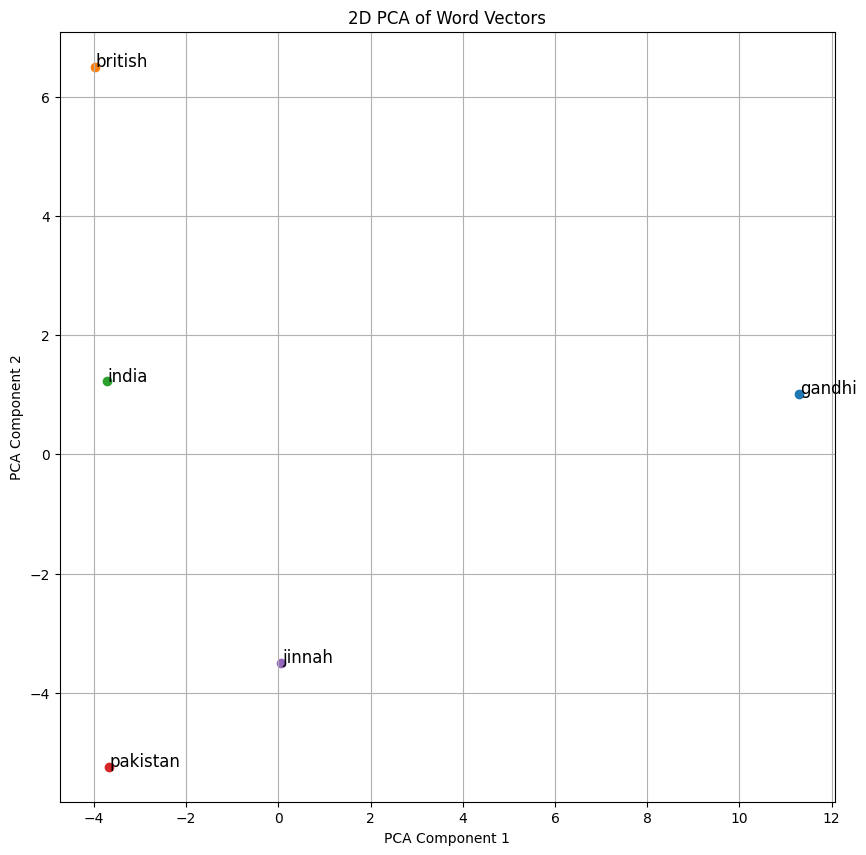

In [132]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['gandhi','british','india','pakistan','jinnah']
word_vectors = [custom_model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

x_range = max(abs(word_vectors_2d[:, 0]))
y_range = max(abs(word_vectors_2d[:, 1]))
x_offset = x_range * 0.001
y_offset = y_range * 0.001

# Plot the 2D vectors with labels
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1],)  # Plot the point
    plt.text(word_vectors_2d[i, 0] + x_offset, word_vectors_2d[i, 1] + y_offset,  # Offset text dynamically
             word, fontsize=12)  # Add word label
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()